In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print(f'NUmero de dígitos: {len(digits.data)}')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
NUmero de dígitos: 1797


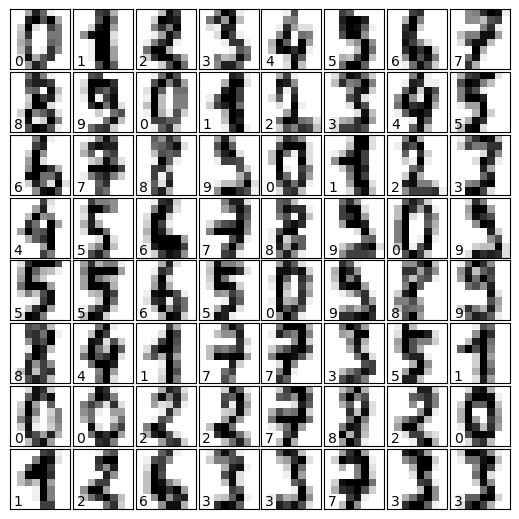

In [53]:
fig = plt.figure(figsize=(5,5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0, test_size=.3)

print(len(ytrain))
print(len(ytest))
print(f'Total data size: {len(digits.data)}\nTraining data size: {len(ytrain)}\nTesting data size: {len(ytest)}')

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
joblib.dump(model, 'random_forest_model.pkl')
ypred = model.predict(Xtest)

import os 
print(os.getcwd())


1257
540
Total data size: 1797
Training data size: 1257
Testing data size: 540
l:\1_PROPUESTAS-OFERTAS-PROYECTOS\220060_GARAY SMART FACTORY\07_EXPERIMENTAL\01_Perfilometria_Laser\zz_Perfilometria_David


In [56]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      0.98      0.98        52
           2       0.96      1.00      0.98        51
           3       0.98      0.96      0.97        55
           4       0.98      1.00      0.99        47
           5       0.96      0.96      0.96        57
           6       1.00      0.98      0.99        61
           7       1.00      0.96      0.98        55
           8       0.95      0.98      0.97        59
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



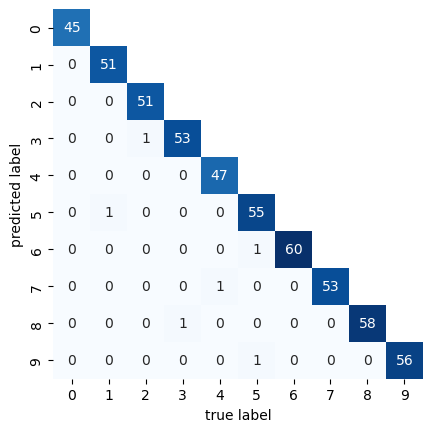

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, ypred)
mask = np.triu(np.ones_like(mat.T), k=1)

sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, cmap='Blues', mask=mask) 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

digit_incorrectos = np.where(ytest != ypred)[0]


Valores clasificados incorrectos: 11
[117 122 124 130 158 181 275 315 331 378 472]


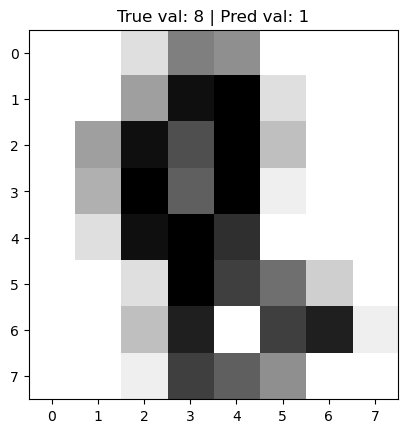

In [62]:
def plot_digit(dgts, tit = None):
    f, ax = plt.subplots()
    ax.imshow(dgts.reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
    if tit: ax.set_title(tit)
    plt.show()

print(f'Valores clasificados incorrectos: {len(digit_incorrectos)}')
print(digit_incorrectos)

ind = digit_incorrectos[2]
# ind = 100
ypred = model.predict([Xtest[ind]])

true_val = ytest[ind]
predict_val = model.predict([Xtest[ind]])[0]
tit = f'True val: {true_val} | Pred val: {predict_val}'
plot_digit(Xtest[ind], tit)

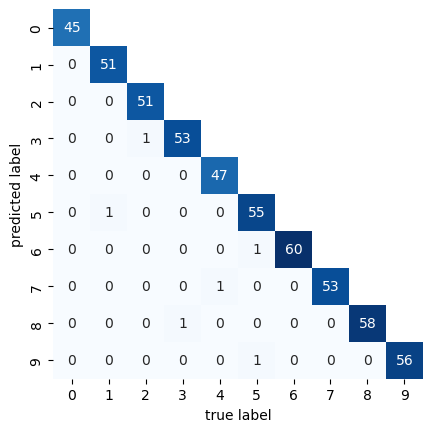

In [64]:
loaded_model = joblib.load('random_forest_model.pkl')

ypred_loaded = loaded_model.predict(Xtest)

mat = confusion_matrix(ytest, ypred_loaded)
mask = np.triu(np.ones_like(mat.T), k=1)

sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, cmap='Blues', mask=mask) 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

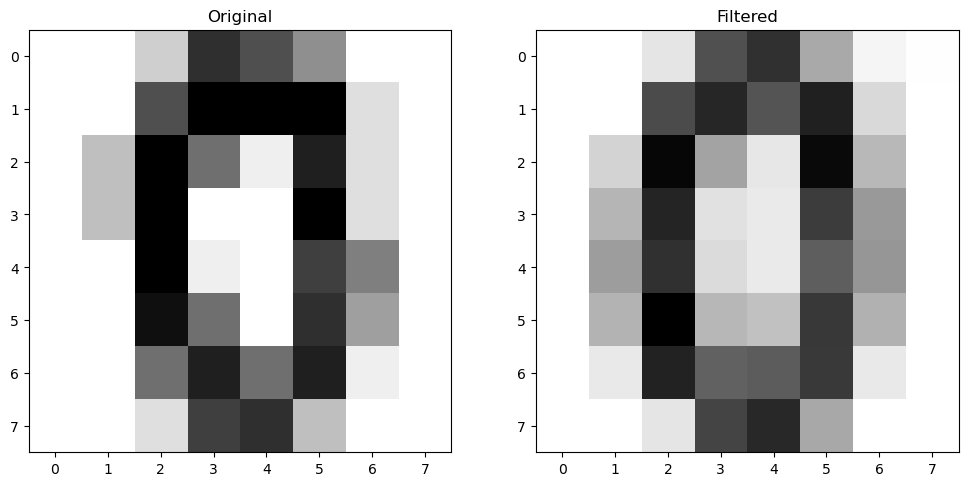

In [69]:
from sklearn.decomposition import PCA

val = 20
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
filtered = pca.inverse_transform(Xproj)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.imshow(digits.data[val].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
ax2.imshow(filtered[val].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
ax1.set_title('Original')
ax2.set_title('Filtered')
plt.show()

Longitud del nuevo vector: 8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.91      0.94        56
           2       0.96      0.94      0.95        54
           3       0.83      0.87      0.85        52
           4       0.98      0.98      0.98        48
           5       0.93      0.95      0.94        56
           6       0.98      0.97      0.98        61
           7       0.94      0.93      0.93        54
           8       0.82      0.94      0.88        53
           9       0.89      0.84      0.86        61

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540



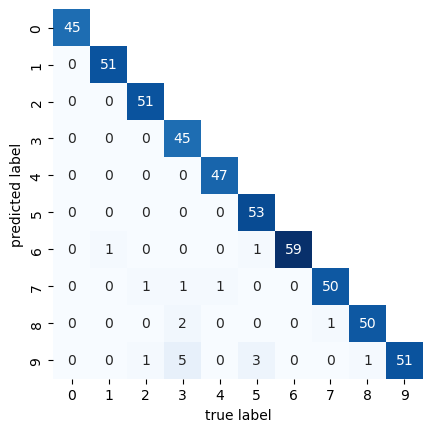

In [70]:
from sklearn import metrics

pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)

print(f'Longitud del nuevo vector: {len(Xproj[0])}')

Xtrain, Xtest, ytrain, ytest = train_test_split(Xproj, digits.target, random_state=0, test_size=.3)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print(metrics.classification_report(ypred, ytest))

mat = confusion_matrix(ytest, ypred)
mask = np.triu(np.ones_like(mat.T), k=1)

sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, cmap='Blues', mask=mask) 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

digit_incorrectos = np.where(ytest != ypred)[0]


Valores clasificados incorrectos: 38


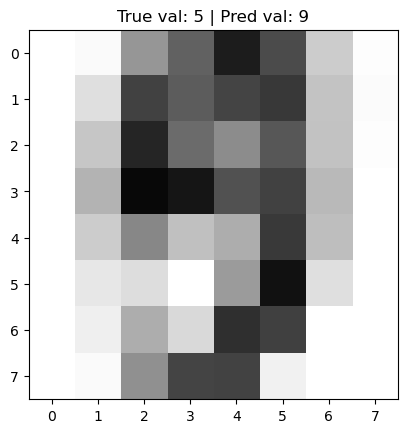

In [83]:
print(f'Valores clasificados incorrectos: {len(digit_incorrectos)}')
ind = digit_incorrectos[2]
# # ind = 100
ypred = model.predict([Xtest[ind]])

true_val = ytest[ind]
predict_val = model.predict([Xtest[ind]])[0]
tit = f'True val: {true_val} | Pred val: {predict_val}'
filtered = pca.inverse_transform(Xtest[ind])
plot_digit(filtered, tit)
